<a href="https://colab.research.google.com/github/MariAnwar/Salary-Prediction/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

In [ ]:
df = pd.read_csv("D:\Courses\Mentorness ML Internship\Project 1\Salary Prediction of Data Professions.csv")
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
df.shape

(2639, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


# Data Preprocessing

### Checking for missing values and the Dublicates

In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [ ]:
df.duplicated().sum()

161

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.shape

(2470, 13)

# EDA

In [ ]:
numeric_data = df.select_dtypes(include=['number']).columns
df[numeric_data]

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,21.0,44570,24.0,6.0,2.0,0
2,21.0,40955,23.0,7.0,3.0,0
3,22.0,45550,22.0,8.0,3.0,0
6,22.0,40339,19.0,11.0,5.0,0
8,28.0,63478,20.0,10.0,3.0,1
...,...,...,...,...,...,...
2634,36.0,185977,15.0,15.0,5.0,10
2635,23.0,45758,17.0,13.0,2.0,0
2636,21.0,47315,29.0,1.0,5.0,0
2637,24.0,45172,23.0,7.0,3.0,1


In [ ]:
# Statistics about data
df[numeric_data].describe().transpose() # correlation between numeric attributes
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_data].corr(),annot=True,cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
AGE,2470.0,24.725506,3.908838,21.0,22.00,24.0,25.00,45.0
SALARY,2470.0,58055.764777,36776.484770,40001.0,43401.25,46737.5,50323.75,388112.0
LEAVES USED,2470.0,22.490688,4.597236,15.0,19.00,22.0,26.00,30.0
LEAVES REMAINING,2470.0,7.509312,4.597236,0.0,4.00,8.0,11.00,15.0
RATINGS,2470.0,3.482186,1.115217,2.0,2.00,3.0,4.00,5.0
PAST EXP,2470.0,1.555870,2.703656,0.0,0.00,1.0,2.00,23.0


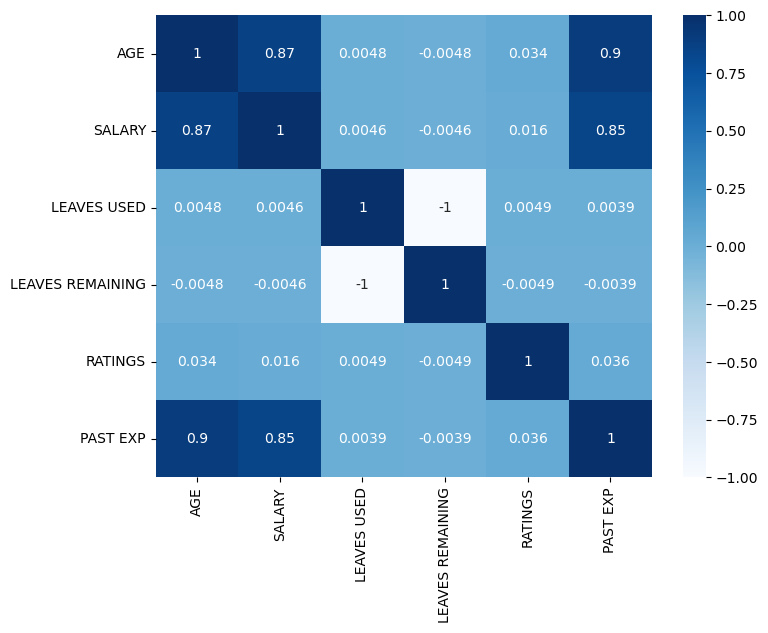

In [ ]:
# correlation between numeric attributes
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_data].corr(),annot=True,cmap = 'Blues');

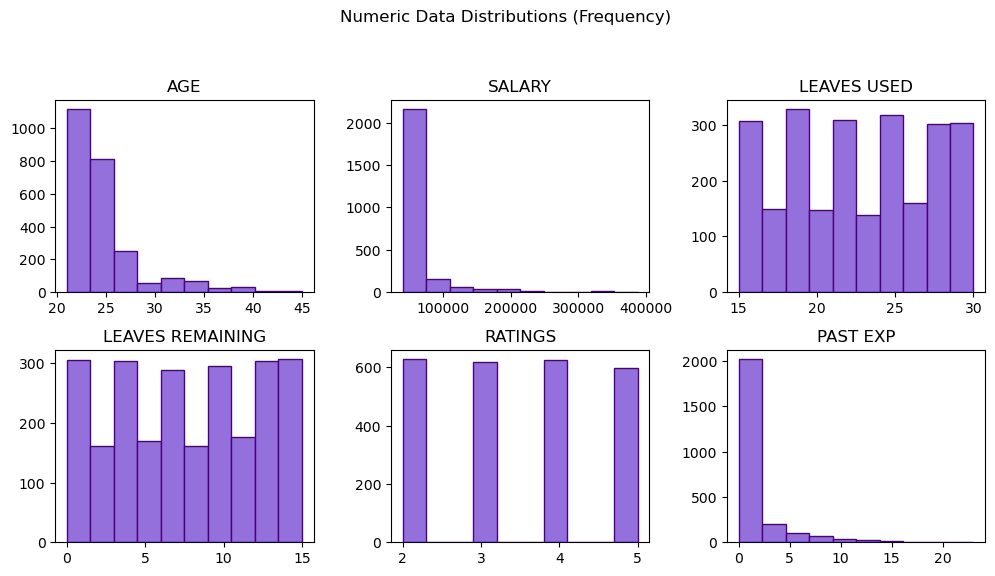

In [ ]:
df[numeric_data].hist(figsize=(12,9),layout=(3,3),color='mediumpurple',edgecolor='indigo',grid=False)
plt.suptitle('Numeric Data Distributions (Frequency)');

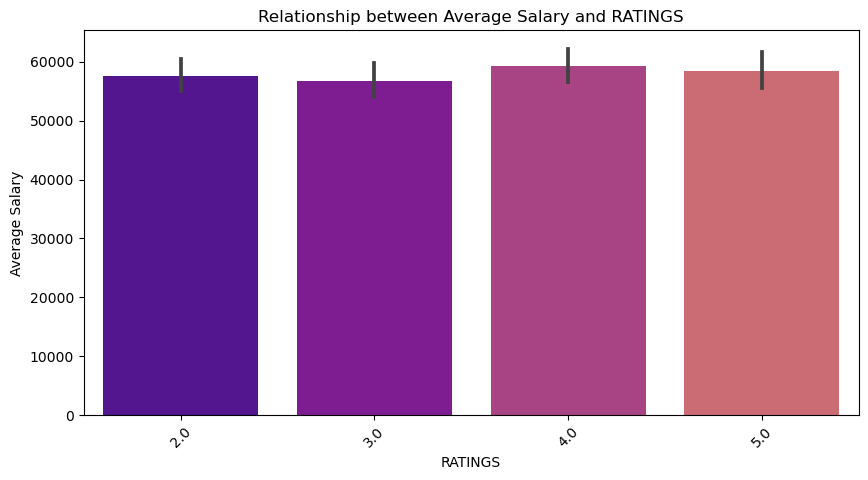

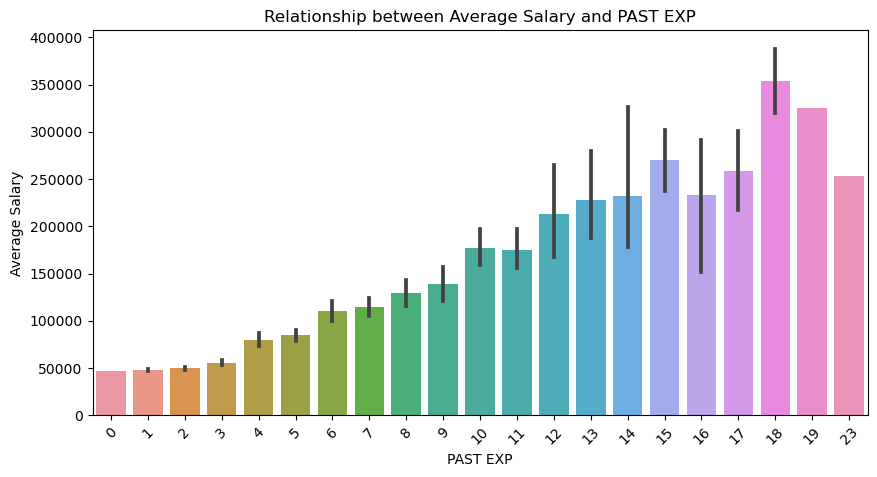

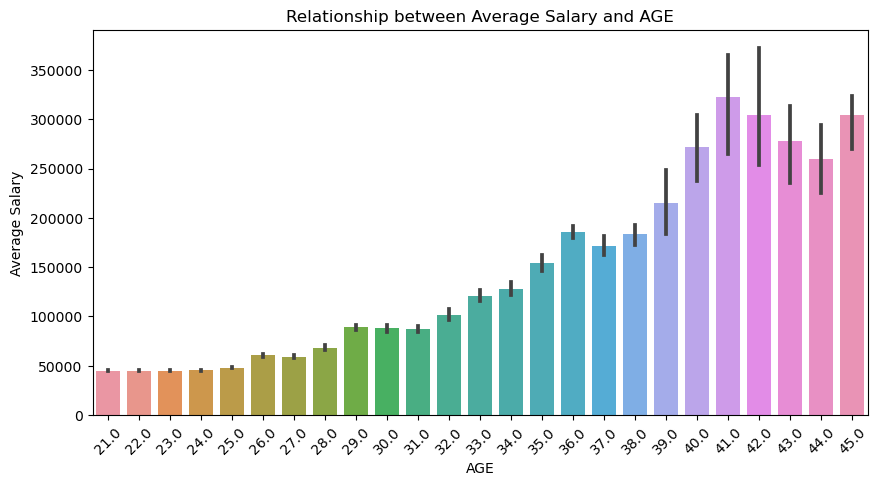

In [ ]:
# Checking the relationship between the target and some of the numeric features
numerical_features = ['RATINGS','PAST EXP', 'AGE']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.set_palette("plasma")
    sns.barplot(x=df[feature], y=df['SALARY'])
    plt.title(f'Relationship between Average Salary and {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.show()

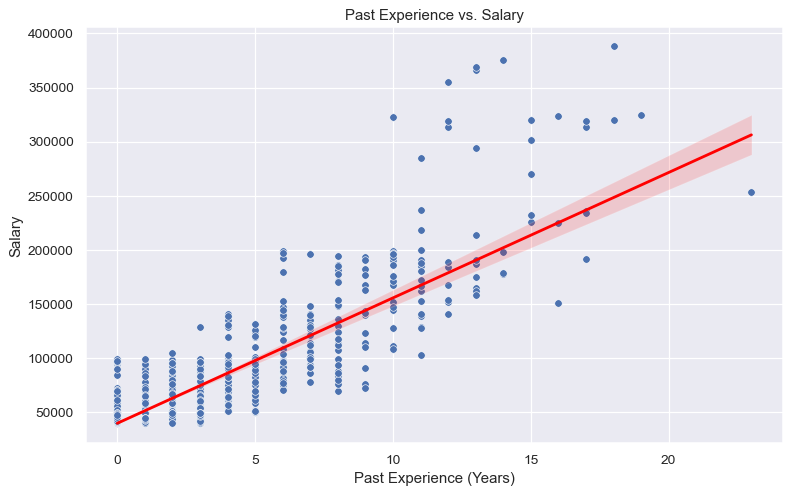

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PAST EXP', y='SALARY', data=df)
sns.regplot(x='PAST EXP', y='SALARY', data=df, scatter=False, color='red')
plt.title('Past Experience vs. Salary')
plt.xlabel('Past Experience (Years)')
plt.ylabel('Salary')
plt.show()

#### I found out that the correlation between (Past experience, Ratings, and Age) features and Salary (Target) is strong. So that they will be considered as important features while training the model.

In [ ]:
categorical_data = df.select_dtypes(include=['object']).columns
df[categorical_data]

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,UNIT
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,Finance
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,Finance
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,IT
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,Marketing
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,Operations
...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,Management
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,IT
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,Web
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,Web


In [ ]:
# Unique values
df[categorical_data].describe().transpose()

,count,unique,top,freq
FIRST NAME,2470,2359,JEWEL,2
LAST NAME,2470,2469,ALMANZA,2
SEX,2470,2,F,1255
DOJ,2470,965,10-19-2013,11
CURRENT DATE,2470,1,01-07-2016,2470
DESIGNATION,2470,6,Analyst,1848
UNIT,2470,6,IT,436


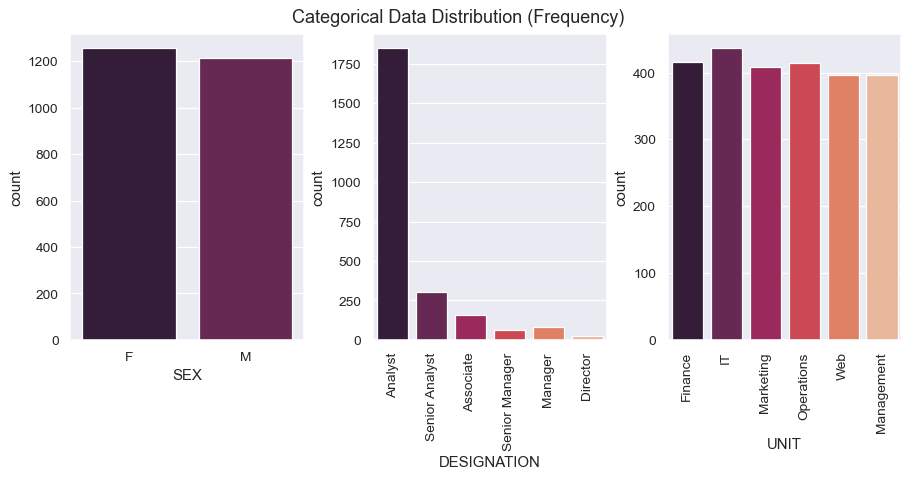

In [ ]:
fig = plt.figure(figsize=(10,12),layout='constrained')
fig.suptitle(' Categorical Data Distribution (Frequency)')

gs = fig.add_gridspec(3,3)

sns.set_palette("rocket")

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(ax=ax1, data=df, x=categorical_data[2])
ax1.tick_params(axis='x', rotation=0)

ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(ax=ax2, data=df, x=categorical_data[5])
ax2.tick_params(axis='x', rotation=90)

ax3 = fig.add_subplot(gs[0, 2])
sns.countplot(ax=ax3, data=df, x=categorical_data[6])
ax3.tick_params(axis='x', rotation=90)


plt.show()

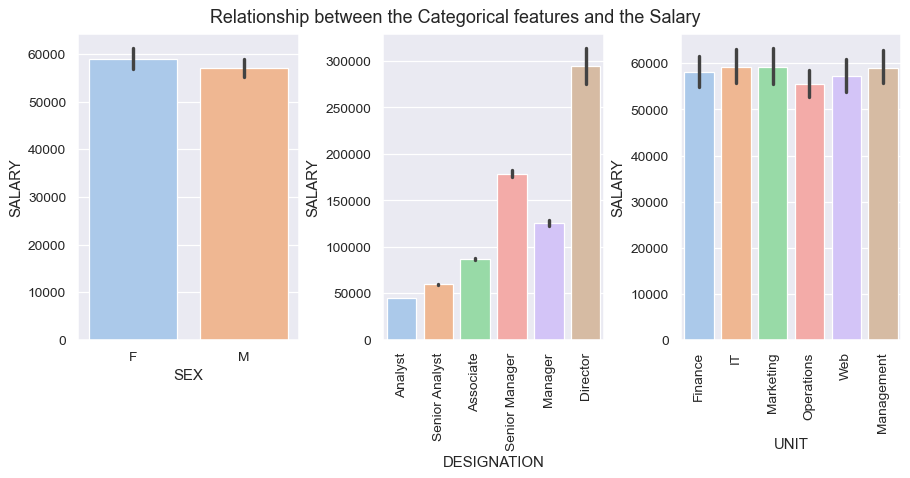

In [ ]:
fig = plt.figure(figsize=(10,12),layout='constrained')
fig.suptitle('Relationship between the Categorical features and the Salary')

gs = fig.add_gridspec(3,3)

sns.set_palette("pastel")

ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=df, x=df['SEX'], y=df['SALARY'])
ax1.tick_params(axis='x', rotation=0)

ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=df, x=df['DESIGNATION'], y=df['SALARY'])
ax2.tick_params(axis='x', rotation=90)

ax3 = fig.add_subplot(gs[0, 2])
sns.barplot(data=df, x=df['UNIT'], y=df['SALARY'])
ax3.tick_params(axis='x', rotation=90)

plt.show()

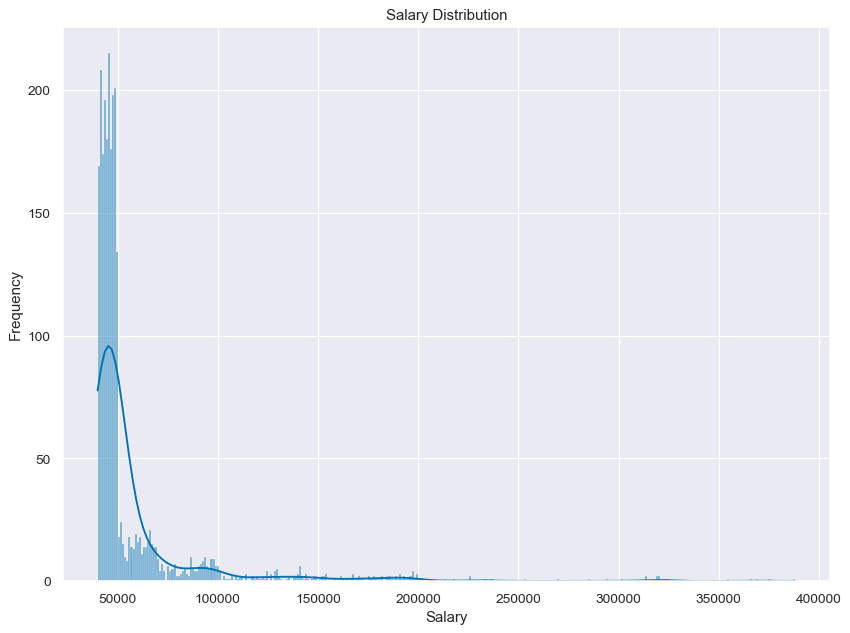

In [ ]:
################ Target Distribution #########
#plt.figure(figsize=(11,8))
sns.set(rc={'figure.figsize':(11,8),'figure.dpi':90})
sns.histplot(df['SALARY'], kde=True, color="#0072B2")
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

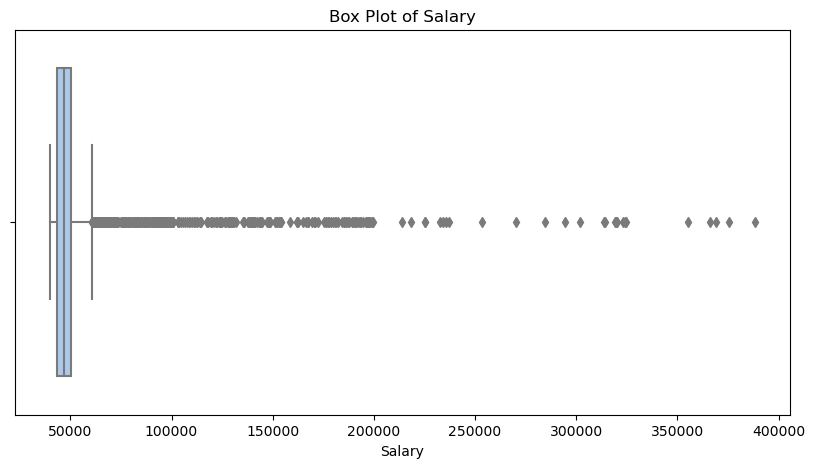

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['SALARY'])
plt.title('Box Plot of Salary')
plt.xlabel('Salary')
plt.show()

#### After checking the Salary distribution, I found out that the distribution is skewed which means that most of the salaries are in the range of 50000.
#### Also it has outliers that their salary are higher than 200000. So, I checked these outliers.

In [ ]:
### Checking the outliers
high_salary_employees = df[df['SALARY'] > 200000]

high = pd.DataFrame(high_salary_employees)

# Display the rows of employees with salary greater than 200,000
high = high.drop(columns=['FIRST NAME', 'LAST NAME'])
high

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
160,F,6-27-2010,01-07-2016,Director,41.0,323196,Marketing,23.0,7.0,3.0,10
166,M,2-13-2013,01-07-2016,Director,42.0,388112,Marketing,27.0,3.0,2.0,18
172,F,1-23-2009,01-07-2016,Director,43.0,284733,Web,15.0,15.0,2.0,11
228,M,4-20-2011,01-07-2016,Director,43.0,313649,IT,21.0,9.0,2.0,17
258,F,8-19-2009,01-07-2016,Director,41.0,375647,Finance,20.0,10.0,5.0,14
263,F,08-10-2014,01-07-2016,Director,43.0,235565,Web,20.0,10.0,4.0,17
325,F,09-02-2012,01-07-2016,Director,45.0,324783,Finance,24.0,6.0,5.0,19
487,F,04-10-2010,01-07-2016,Director,40.0,313938,Management,22.0,8.0,4.0,12
683,M,12-08-2014,01-07-2016,Director,45.0,253284,IT,15.0,15.0,2.0,23
703,F,12-10-2009,01-07-2016,Director,45.0,319141,Web,21.0,9.0,4.0,17


#### After Checking the outliers by filtering the data to display only the professions whose salaries are higher than 200000, I found out all of them are Directors, most of them aged above 40, and their experience is more than ten years.
#### So, based on the previous distributions of the features and their correlation between the salary which means they are not considered outliers.

# Feature Engineering

Since the "Past Experience" feature has a strong relation with salary. So, the total time in the position from the date of joining to the Current date is considered experience. Thus, I calculated the total experience by adding the duration (in years) of joining the position to the experience. And it has a strong relation with salary.

In [ ]:
# Convert date columns to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

In [ ]:
# Calculate the duration in days
df['DURATION'] = df['CURRENT DATE'] - df['DOJ']
df['DURATION_YEARS'] = df['DURATION'].dt.days / 365.25

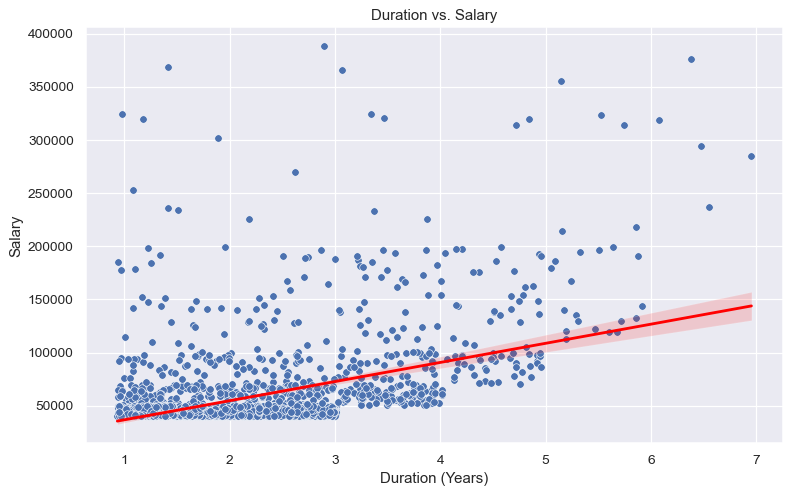

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DURATION_YEARS', y='SALARY', data=df)
sns.regplot(x='DURATION_YEARS', y='SALARY', data=df, scatter=False, color='red')
plt.title('Duration vs. Salary')
plt.xlabel('Duration (Years)')
plt.ylabel('Salary')
plt.show()   #There is a strong relation between the Duration and the Salary

In [ ]:
df["EXP"] = df["PAST EXP"] + df["DURATION_YEARS"]  # The total Experience of each data profession
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DURATION,DURATION_YEARS,EXP
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599 days,1.639973,1.639973
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528 days,1.445585,1.445585
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009 days,2.762491,2.762491
6,ELLIOT,AGULAR,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,857 days,2.346338,2.346338
8,KATHY,ALSOP,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,557 days,1.524983,2.524983


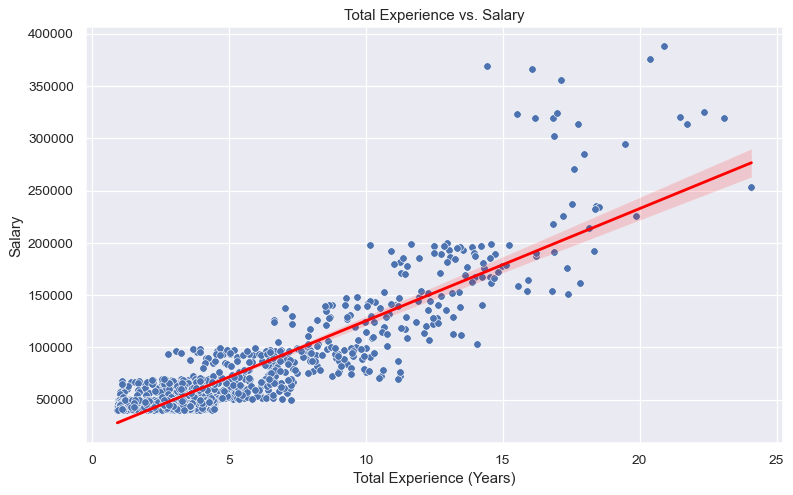

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EXP', y='SALARY', data=df)
sns.regplot(x='EXP', y='SALARY', data=df, scatter=False, color='red')
plt.title('Total Experience vs. Salary')
plt.xlabel('Total Experience (Years)')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Choosing the best features based on their relation between them and the Salary
data = df[['EXP', 'PAST EXP', 'SEX', 'UNIT', 'DESIGNATION', 'AGE', 'RATINGS', 'SALARY']]
data.head()

,EXP,PAST EXP,SEX,UNIT,DESIGNATION,AGE,RATINGS,SALARY
0,1.639973,0,F,Finance,Analyst,21.0,2.0,44570
2,1.445585,0,F,Finance,Analyst,21.0,3.0,40955
3,2.762491,0,F,IT,Analyst,22.0,3.0,45550
6,2.346338,0,M,Marketing,Analyst,22.0,5.0,40339
8,2.524983,1,F,Operations,Senior Analyst,28.0,3.0,63478


### Splitting the Data and Encoding the data for model training

In [ ]:
# Define features and target
X = data.drop(columns=['SALARY'])
y = data['SALARY']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,EXP,PAST EXP,SEX,UNIT,DESIGNATION,AGE,RATINGS
993,3.135524,1,M,Marketing,Analyst,24.0,2.0
1682,4.313484,2,M,Web,Analyst,25.0,4.0
1591,2.270363,1,F,Operations,Analyst,23.0,3.0
2520,4.451061,3,F,Web,Analyst,25.0,3.0
888,3.746749,2,F,IT,Analyst,25.0,4.0
...,...,...,...,...,...,...,...
1714,6.868583,3,F,Finance,Associate,31.0,2.0
1131,3.577002,2,M,IT,Analyst,25.0,5.0
1168,6.366188,5,F,Web,Senior Analyst,28.0,2.0
1344,2.168378,0,F,Management,Analyst,23.0,3.0


### Training various machine learning regression models for choosing the best model based on the MSE, RMSE, and R-squared metrics.




#### Applying transformers for some features before training the model to be able to train:
* Ordinal Encoder: For encoding the categorical features that have ordinal values.
*  OneHot Encoder: For encoding the categorical features (transforming each unique value to a binary column).
*  Standard Scaler: For scaling the numeric features.

In [ ]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[['Analyst', 'Senior Analyst', 'Associate', 'Manager', 'Senior Manager', 'Director']]), ['DESIGNATION']),
        ('onehot', OneHotEncoder(), ["UNIT","SEX"]),
        ('scaler', StandardScaler(), ["EXP", "PAST EXP", "AGE", "RATINGS"])
    ],
    remainder='passthrough'
)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet()
}

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Fit and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ("s1", preprocessor),
        ("model", model),
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae, rmse, r2 = evaluate_model(y_test, y_pred)
    print(f"{name} -> MAE: {mae}, RMSE: {rmse}, R2: {r2}")

Linear Regression -> MAE: 6740.2906421815505, RMSE: 13647.334752505976, R2: 0.8565675179041458
Random Forest Regression -> MAE: 4298.439542992095, RMSE: 8128.270512504469, R2: 0.9491198805130862
Logistic Regression -> MAE: 9944.427125506072, RMSE: 22431.051757809717, R2: 0.6125183859838722
Decision Tree Regression -> MAE: 5763.811740890688, RMSE: 10853.719606921308, R2: 0.9092787509514066
Gradient Boosting Regression -> MAE: 4204.78957070783, RMSE: 8454.795337924268, R2: 0.9449499112252393
K-Nearest Neighbors Regression -> MAE: 5078.254251012146, RMSE: 10489.273438711796, R2: 0.9152689401050683
Ridge Regression -> MAE: 6732.027492299224, RMSE: 13646.019900549914, R2: 0.8565951545669959
Lasso Regression -> MAE: 6738.514353881228, RMSE: 13646.779544075012, R2: 0.856579188066108
Elastic Net -> MAE: 7920.599305974858, RMSE: 15282.771974491558, R2: 0.8201310946006899


### Based on the MAE, RMSE, and R squared of all the models. The Random Forest Regression model gives the highest values. So, Tuning its parameters using GridSearchCV will give higher values.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[['Analyst', 'Senior Analyst', 'Associate', 'Manager', 'Senior Manager', 'Director']]), ['DESIGNATION']),
        ('onehot', OneHotEncoder(), ["UNIT","SEX"]),
        ('scaler', StandardScaler(), ["EXP", "PAST EXP", "AGE", "RATINGS"])
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
        ("s1", preprocessor),
        ("model", RandomForestRegressor())
    ])

In [ ]:
# Define the parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

# Perform grid search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}


In [ ]:
pipeline = Pipeline([
        ("s1", preprocessor),
        ("model", RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200))
    ])
pipeline

Pipeline(steps=[('s1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Analyst',
                                                                              'Senior '
                                                                              'Analyst',
                                                                              'Associate',
                                                                              'Manager',
                                                                              'Senior '
                                                                              'Manager',
                                                                              'Director']]),
                                                  ['DESIGNATION']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['UNIT', 'SEX']),
                                                 ('scaler', StandardScaler(),
                                                  ['EXP', 'PAST EXP', 'AGE',
                                                   'RATINGS'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_split=5,
                                       n_estimators=200))])

In [ ]:
# Fit the best model on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the mode
mae, rmse, r2 = evaluate_model(y_test, y_pred)
print(f"Random Forest Regression -> MAE: {mae}, RMSE: {rmse}, R2: {r2}")

Random Forest Regression -> MAE: 4188.749878254998, RMSE: 8105.124273675323, R2: 0.9494092425851628


In [ ]:
# Save the model
joblib.dump(pipeline, 'model.joblib')

['model.joblib']

### Now, I have a saved pipeline that includes the transformers and the tuned Random Forest Regression model.

### After Saving the model, we can use it for unseen data.

In [ ]:
def load_model():
    return joblib.load('model.joblib')

def get_user_input():
    user_data = {
        'SEX': input("Enter Gender (M/F): "),
        'DESIGNATION': input("Enter Designation: "),
        'UNIT': input("Enter Business Unit: "),
        'AGE': int(input("Enter Age: ")),
        'LEAVES USED': int(input("Enter Leaves Used: ")),
        'LEAVES REMAINING': int(input("Enter Leaves Remaining: ")),
        'RATINGS': float(input("Enter Ratings: ")),
        'PAST EXP': int(input("Enter Past Experience: ")),
        'DOJ': input("Enter Date of Joining (MM-DD-YYYY): "),
        'CURRENT DATE': input("Enter Current Date (MM-DD-YYYY): ")
    }
    return user_data

In [ ]:
def preprocess_input(user_data):
    # Convert the user data to a DataFrame
    df = pd.DataFrame([user_data])

    # Calculate duration and the total experience
    df['DOJ'] = pd.to_datetime(df['DOJ'])
    df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])
    df['DURATION_YEARS'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365
    df["EXP"] = df["PAST EXP"] + df["DURATION_YEARS"]

    # Drop the original date columns
    df = df.drop(columns=['DOJ', 'CURRENT DATE', 'DURATION_YEARS', 'LEAVES USED', 'LEAVES REMAINING'])

    print(df)

    return df

In [ ]:
def predict_salary(model, user_data):
    processed_data = preprocess_input(user_data)
    prediction = model.predict(processed_data)
    return prediction[0]

In [ ]:
# Get user input
user_data = get_user_input()

# Predict salary
predicted_salary = predict_salary(pipeline, user_data)
print(f"Predicted Salary: {predicted_salary}")

Enter Gender (M/F): F
Enter Designation: Analyst
Enter Business Unit: Web
Enter Age: 28
Enter Leaves Used: 4
Enter Leaves Remaining: 17
Enter Ratings: 3
Enter Past Experience: 3
Enter Date of Joining (MM-DD-YYYY): 6-1-2023
Enter Current Date (MM-DD-YYYY): 6-22-2024
  SEX DESIGNATION UNIT  AGE  RATINGS  PAST EXP       EXP
0   F     Analyst  Web   28      3.0         3  4.060274
Predicted Salary: 45541.79116964435


In [ ]:
# Get user input
user_data = get_user_input()

# Predict salary
predicted_salary = predict_salary(pipeline, user_data)
print(f"Predicted Salary: {predicted_salary}")

Enter Gender (M/F): M
Enter Designation: Analyst
Enter Business Unit: Web
Enter Age: 28
Enter Leaves Used: 4
Enter Leaves Remaining: 17
Enter Ratings: 3
Enter Past Experience: 3
Enter Date of Joining (MM-DD-YYYY): 6-1-2023
Enter Current Date (MM-DD-YYYY): 6-22-2024
  SEX DESIGNATION UNIT  AGE  RATINGS  PAST EXP       EXP
0   M     Analyst  Web   28      3.0         3  4.060274
Predicted Salary: 45159.06165540249


In [ ]:
# Get user input
user_data = get_user_input()

# Predict salary
predicted_salary = predict_salary(pipeline, user_data)
print(f"Predicted Salary: {predicted_salary}")

Enter Gender (M/F): F
Enter Designation: Senior Analyst
Enter Business Unit: IT
Enter Age: 35
Enter Leaves Used: 8
Enter Leaves Remaining: 22
Enter Ratings: 4
Enter Past Experience: 10
Enter Date of Joining (MM-DD-YYYY): 1-10-2022
Enter Current Date (MM-DD-YYYY): 6-22-2024
  SEX     DESIGNATION UNIT  AGE  RATINGS  PAST EXP        EXP
0   F  Senior Analyst   IT   35      4.0        10  12.449315
Predicted Salary: 59932.08864132984


In [ ]:
# Get user input
user_data = get_user_input()

# Predict salary
predicted_salary = predict_salary(pipeline, user_data)
print(f"Predicted Salary: {predicted_salary}")

Enter Gender (M/F): F
Enter Designation: Senior Analyst
Enter Business Unit: IT
Enter Age: 30
Enter Leaves Used: 8
Enter Leaves Remaining: 22
Enter Ratings: 4
Enter Past Experience: 8
Enter Date of Joining (MM-DD-YYYY): 1-10-2022
Enter Current Date (MM-DD-YYYY): 6-22-2024
  SEX     DESIGNATION UNIT  AGE  RATINGS  PAST EXP        EXP
0   F  Senior Analyst   IT   30      4.0         8  10.449315
Predicted Salary: 61411.53859166531


In [ ]:
# Get user input
user_data = get_user_input()

# Predict salary
predicted_salary = predict_salary(pipeline, user_data)
print(f"Predicted Salary: {predicted_salary}")

Enter Gender (M/F): F
Enter Designation: Associate
Enter Business Unit: IT
Enter Age: 30
Enter Leaves Used: 5
Enter Leaves Remaining: 22
Enter Ratings: 4
Enter Past Experience: 8
Enter Date of Joining (MM-DD-YYYY): 1-10-2022
Enter Current Date (MM-DD-YYYY): 6-22-2024
  SEX DESIGNATION UNIT  AGE  RATINGS  PAST EXP        EXP
0   F   Associate   IT   30      4.0         8  10.449315
Predicted Salary: 82272.06879318693
